# <center>研究报告</center>

## 二、数据研究报告
### 1. 描述性统计

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"] #解决中文字符乱码的问题
plt.rcParams["axes.unicode_minus"] = False #正常显示负号
import warnings
warnings.filterwarnings("ignore") #关闭一些可能出现但对数据分析并无影响的警告

In [15]:
names = "海峡两岸"
df = pd.read_excel('./XXHJL_DB1.xlsx',sheet_name=names,header=0)
df[:5] #数据导入与展示

,CODE,NAME,OI2012,OI2013,OI2014,OI2015,OI2016,OI2017,OI2018,OI2019,...,OTH2018,OTH2019,OTH2020,OTH2021,PE,PB,GPM,NPM,EV,EM
0,600033.SH,福建高速,24.2543,26.2512,26.3603,25.7776,25.2813,24.7427,26.6267,29.0414,...,312,300.0,569,569,8.6987,0.7276,62.5031,42.0178,120.8966,4.7404
1,600067.SH,冠城大通,62.5627,82.2548,75.6421,74.0221,61.2916,68.9699,81.0853,77.8733,...,1061,1017.0,758,796,45.5480,0.7134,18.0723,2.2433,119.0876,-27.2421
2,600103.SH,青山纸业,17.1949,18.0921,18.9549,21.1161,22.7775,26.5554,28.6051,26.7026,...,2257,2145.0,1979,1949,22.5640,1.5618,20.8704,8.8744,68.7938,14.5834
3,600153.SH,建发股份,911.6697,1020.6780,1209.2483,1280.8856,1455.9089,2186.0158,2803.8179,3372.3867,...,3756,4079.0,4595,5888,8.0497,0.7701,2.987,0.8900,2698.1139,10.0777
4,600388.SH,ST龙净,42.4019,55.6821,60.2666,73.9096,80.2354,81.1269,94.0230,109.3503,...,4124,4415.0,4539,4526,19.0311,1.9911,24.0523,7.8546,191.995,11.528


In [16]:
df.describe().round(2) #描述性分析

,OI2012,OI2013,OI2014,OI2015,OI2016,OI2017,OI2018,OI2019,OI2020,OI2021,...,PCS2014,PCS2017,PCS2018,PCS2019,PCS2020,PCS2021,OTH2019,PE,PB,NPM
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,...,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,118.70,138.98,156.56,173.04,198.23,260.12,320.95,363.43,470.82,658.90,...,113674.88,136658.56,152582.34,158534.67,165997.37,184139.10,1899.04,-3.60,2.63,-1.15
std,254.45,300.66,349.13,404.38,450.04,587.48,733.68,847.91,1146.10,1703.94,...,62770.38,67505.58,77139.53,78971.31,84997.08,100497.09,2559.98,206.15,3.49,46.27
min,1.56,1.74,1.90,1.99,1.38,1.75,1.68,1.29,1.48,1.90,...,42612.40,62709.45,76220.40,82135.30,77000.42,64391.81,43.00,-944.74,0.57,-153.28
25%,9.60,10.82,12.04,10.99,13.00,14.47,13.15,13.39,13.15,18.23,...,83827.98,94551.03,111978.07,117283.03,121131.90,132875.52,279.00,6.16,0.85,0.85
50%,22.15,22.11,20.93,22.60,25.50,32.26,30.32,35.72,30.38,33.39,...,97953.60,124420.82,130759.91,136645.66,140551.42,153821.92,894.50,21.23,1.54,4.02
75%,50.68,62.33,75.18,73.94,81.50,95.13,103.99,117.40,115.62,143.67,...,138934.55,147588.70,153399.52,159623.26,194354.40,207673.53,2244.50,66.78,3.27,9.86
max,911.67,1092.87,1248.98,1543.48,1570.60,2186.02,2803.82,3372.39,4329.49,7078.44,...,345899.55,385945.84,416042.76,463286.74,487523.06,554695.62,10193.00,180.62,17.52,57.70


In [17]:
df = df.replace('--',0) #空值处理
df = df.set_index('NAME') #设置公司名称列为索引列

### 2. 金融指标分析
#### (1) 营业收入

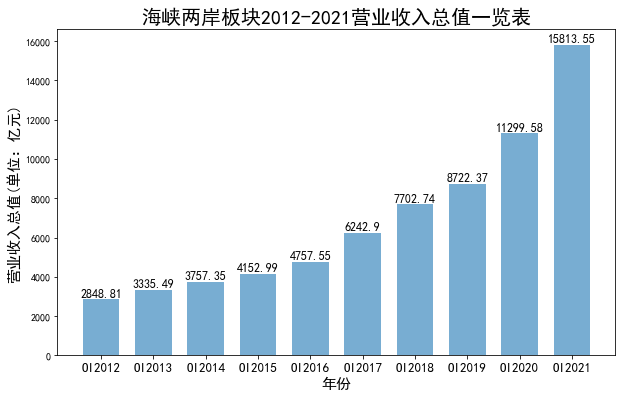

In [18]:
#需求1
sumoi = df.sum()[0:10]
x = sumoi.index
y = sumoi.values
y = y.astype("float").round(2)
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_xlabel("年份",fontsize = 15)
ax1.set_ylabel("营业收入总值(单位：亿元)",fontsize = 15)
ax1.set_title("海峡两岸板块2012-2021营业收入总值一览表",fontsize = 20)
plt.xticks(size = 13)
for a,b in zip(x,y):
    ax1.text(a,b+1,b,ha = "center",va = "bottom",fontsize =12)
plt.show()

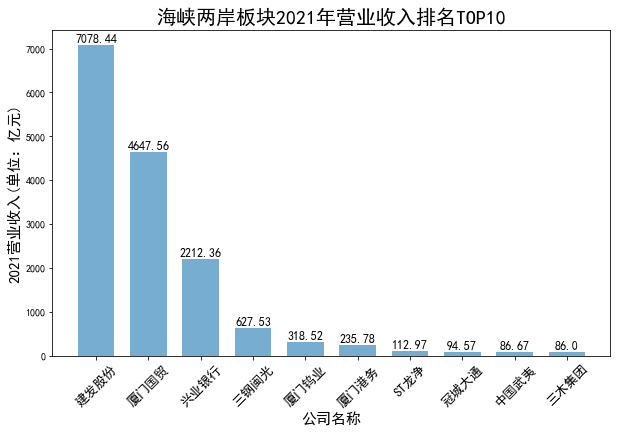

In [19]:
#需求2
stoi = df['OI2021'].sort_values(ascending=False)[:10].round(2)
x = stoi.index
y = stoi.values
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_xlabel("公司名称",fontsize = 15)
ax1.set_ylabel("2021营业收入(单位：亿元)",fontsize = 15)
ax1.set_title("海峡两岸板块2021年营业收入排名TOP10",fontsize = 20)
plt.xticks(rotation = 45,size = 13)
for a,b in zip(x,y):
    ax1.text(a,b+1,b,ha = "center",va = "bottom",fontsize =12)
plt.show()

#### (2) 净利润

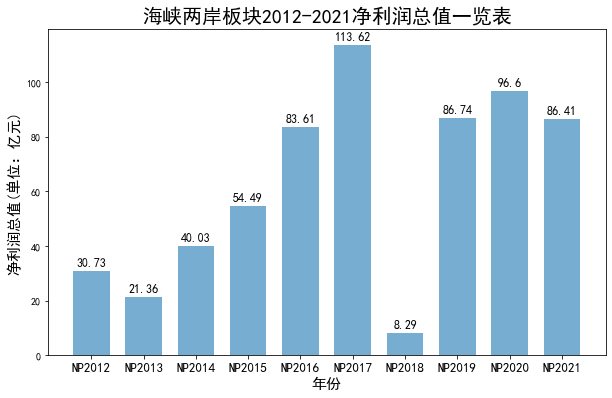

In [10]:
#需求3
sumnp = df.sum()[10:20]
x = sumnp.index
y = sumnp.values
y = y.astype("float").round(2)
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_xlabel("年份",fontsize = 15)
ax1.set_ylabel("净利润总值(单位：亿元)",fontsize = 15)
ax1.set_title("海峡两岸板块2012-2021净利润总值一览表",fontsize = 20)
plt.xticks(size = 13)
for a,b in zip(x,y):
    ax1.text(a,b+1,b,ha = "center",va = "bottom",fontsize =12)
plt.show()

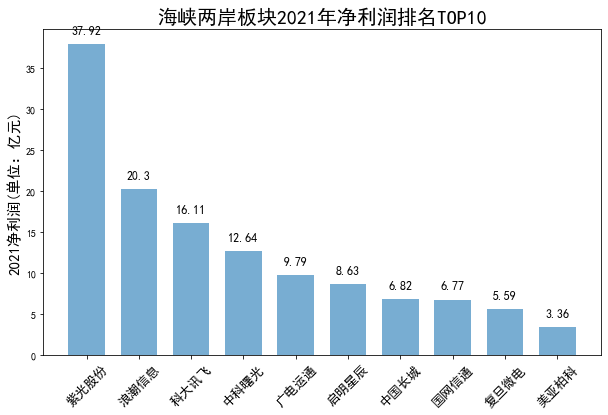

In [11]:
#需求4
stnp = df['NP2021'].sort_values(ascending=False)[:10].round(2)
x = stnp.index
y = stnp.values
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_ylabel("2021净利润(单位：亿元)",fontsize = 15)
ax1.set_title("海峡两岸板块2021年净利润排名TOP10",fontsize = 20)
plt.xticks(rotation = 45,size = 13)
for a,b in zip(x,y):
    ax1.text(a,b+1,b,ha = "center",va = "bottom",fontsize =12)
plt.show()

#### (3) ROE

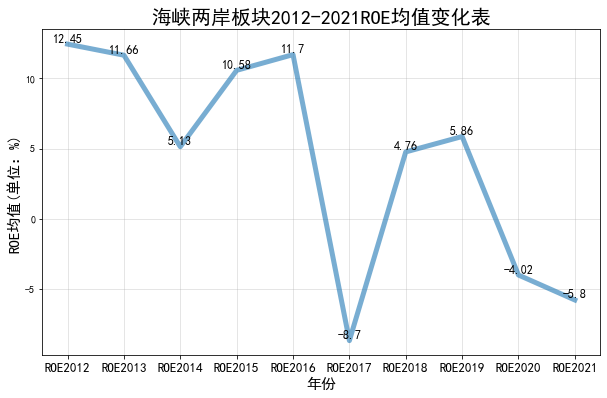

In [12]:
#需求5
meroe = df.mean()[30:40]
x = meroe.index
y = meroe.values
y = y.astype("float").round(2)
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.plot(x,y,alpha = 0.6,linewidth = 5)
ax1.set_xlabel("年份",fontsize = 15)
ax1.set_ylabel("ROE均值(单位：%)",fontsize = 15)
ax1.set_title("海峡两岸板块2012-2021ROE均值变化表",fontsize = 20)
for a,b in zip(x,y):
    ax1.text(a,b,b,ha = "center",va = "bottom",fontsize =12)
plt.grid(alpha = 0.4)
plt.xticks(size = 13)
plt.show()

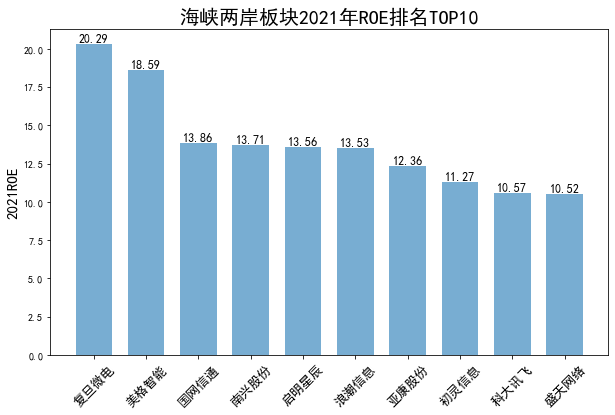

In [13]:
#需求6
stroe = df['ROE2021'].sort_values(ascending=False)[:10].round(2)
x = stroe.index
y = stroe.values
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_ylabel("2021ROE",fontsize = 15)
ax1.set_title("海峡两岸板块2021年ROE排名TOP10",fontsize = 20)
plt.xticks(rotation = 45,size = 13)
for a,b in zip(x,y):
    ax1.text(a,b,b,ha = "center",va = "bottom",fontsize =12)
plt.show()

#### (4)总市值

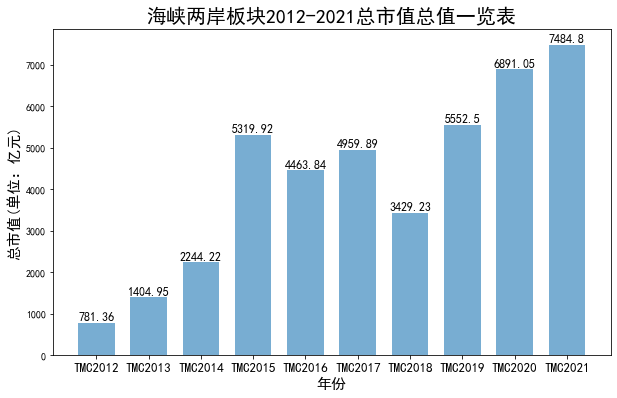

In [14]:
#需求7
sumtmc = df.sum()[20:30]
x = sumtmc.index
y = sumtmc.values
y = y.astype("float").round(2)
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_xlabel("年份",fontsize = 15)
ax1.set_ylabel("总市值(单位：亿元)",fontsize = 15)
ax1.set_title("海峡两岸板块2012-2021总市值总值一览表",fontsize = 20)
plt.xticks(size = 13)
for a,b in zip(x,y):
    ax1.text(a,b+1,b,ha = "center",va = "bottom",fontsize =12)

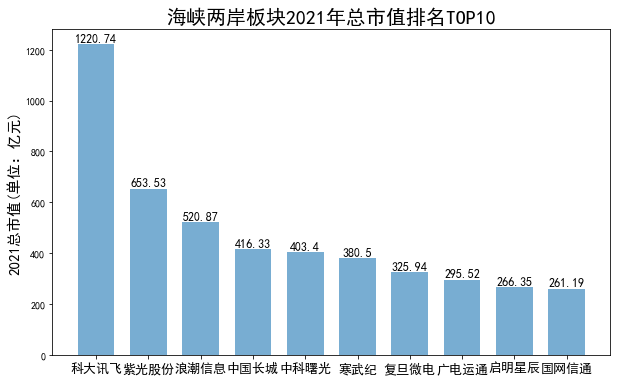

In [15]:
#需求8
sttmc = df['TMC2021'].sort_values(ascending=False)[:10].round(2)
x = sttmc.index
y = sttmc.values
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_ylabel("2021总市值(单位：亿元)",fontsize = 15)
ax1.set_title("海峡两岸板块2021年总市值排名TOP10",fontsize = 20)
plt.xticks(rotation = 0,size = 13)
for a,b in zip(x,y):
    ax1.text(a,b+1,b,ha = "center",va = "bottom",fontsize =12)
plt.show()

#### (5)人均薪酬

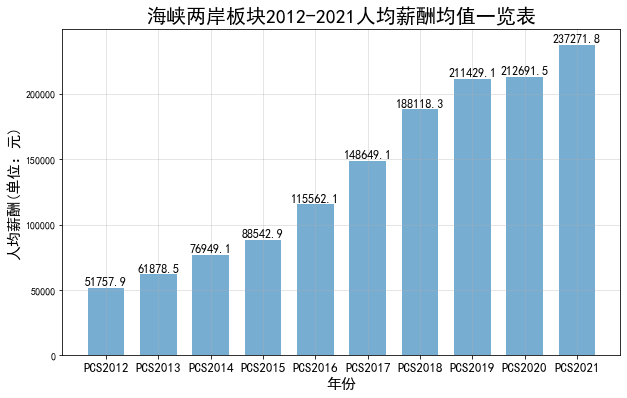

In [16]:
#需求9
mepcs = df.mean()[40:50]
x = mepcs.index
y = mepcs.values
y = y.astype("float").round(1)
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_xlabel("年份",fontsize = 15)
ax1.set_ylabel("人均薪酬(单位：元)",fontsize = 15)
ax1.set_title("海峡两岸板块2012-2021人均薪酬均值一览表",fontsize = 20)
for a,b in zip(x,y):
    ax1.text(a,b,b,ha = "center",va = "bottom",fontsize =12)
plt.grid(alpha = 0.4) 
plt.xticks(size = 13)
plt.show()

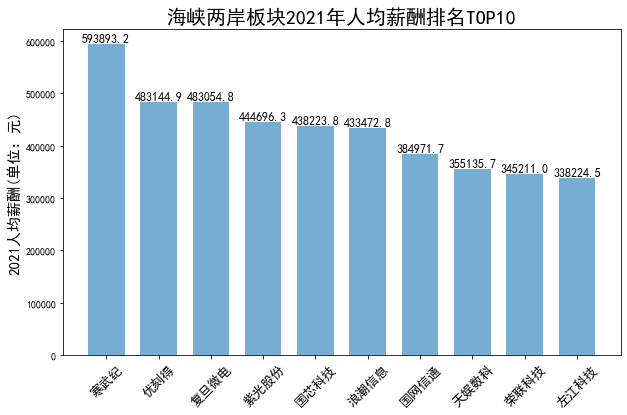

In [17]:
#需求10
stpcs = df['PCS2021'].sort_values(ascending=False)[:10].round(1)
x = stpcs.index
y = stpcs.values
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_ylabel("2021人均薪酬(单位：元)",fontsize = 15)
ax1.set_title("海峡两岸板块2021年人均薪酬排名TOP10",fontsize = 20)
plt.xticks(rotation = 45,size = 13)
for a,b in zip(x,y):
    ax1.text(a,b+1,b,ha = "center",va = "bottom",fontsize =12)
plt.show()

#### (6) 员工学历

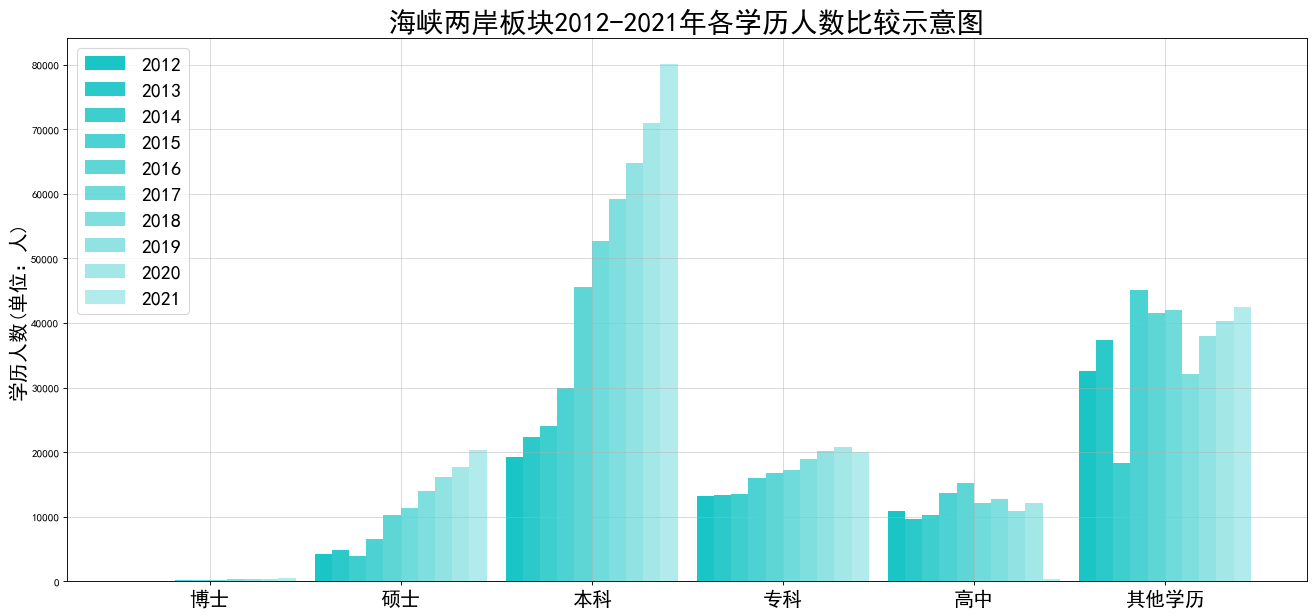

In [18]:
#需求11
sumst = df.sum()[50:110]
labels = ['博士','硕士','本科','专科','高中','其他学历']
S2012 = [sumst['DR2012'],sumst['GRA2012'],sumst['UND2012'],sumst['JUS2012'],sumst['HIG2012'],sumst['OTH2012']]
S2013 = [sumst['DR2013'],sumst['GRA2013'],sumst['UND2013'],sumst['JUS2013'],sumst['HIG2013'],sumst['OTH2013']]
S2014 = [sumst['DR2014'],sumst['GRA2014'],sumst['UND2014'],sumst['JUS2014'],sumst['HIG2014'],sumst['OTH2014']]
S2015 = [sumst['DR2015'],sumst['GRA2015'],sumst['UND2015'],sumst['JUS2015'],sumst['HIG2015'],sumst['OTH2015']]
S2016 = [sumst['DR2016'],sumst['GRA2016'],sumst['UND2016'],sumst['JUS2016'],sumst['HIG2016'],sumst['OTH2016']]
S2017 = [sumst['DR2017'],sumst['GRA2017'],sumst['UND2017'],sumst['JUS2017'],sumst['HIG2017'],sumst['OTH2017']]
S2018 = [sumst['DR2018'],sumst['GRA2018'],sumst['UND2018'],sumst['JUS2018'],sumst['HIG2018'],sumst['OTH2018']]
S2019 = [sumst['DR2019'],sumst['GRA2019'],sumst['UND2019'],sumst['JUS2019'],sumst['HIG2019'],sumst['OTH2019']]
S2020 = [sumst['DR2020'],sumst['GRA2020'],sumst['UND2020'],sumst['JUS2020'],sumst['HIG2020'],sumst['OTH2020']]
S2021 = [sumst['DR2021'],sumst['GRA2021'],sumst['UND2021'],sumst['JUS2021'],sumst['HIG2021'],sumst['OTH2021']]

x = np.arange(len(labels))
width = 0.09
plt.figure(figsize=(20,9),dpi = 80)
plt.bar(x - 4.5*width,S2012, width, label='2012',color = 'c',alpha = 0.9)
plt.bar(x - 3.5*width,S2013, width, label='2013',color = 'c',alpha = 0.83)
plt.bar(x - 2.5*width,S2014, width, label='2014',color = 'c',alpha = 0.76)
plt.bar(x - 1.5*width,S2015, width, label='2015',color = 'c',alpha = 0.7)
plt.bar(x - 0.5*width,S2016, width, label='2016',color = 'c',alpha = 0.63)
plt.bar(x + 0.5*width,S2017, width, label='2017',color = 'c',alpha = 0.56) 
plt.bar(x + 1.5*width,S2018, width, label='2018',color = 'c',alpha = 0.5)
plt.bar(x + 2.5*width,S2019, width, label='2019',color = 'c',alpha = 0.43)
plt.bar(x + 3.5*width,S2020, width, label='2020',color = 'c',alpha = 0.36)
plt.bar(x + 4.5*width,S2021, width, label='2021',color = 'c',alpha = 0.3)
plt.ylabel('学历人数(单位：人)',fontsize = 18)
plt.title('海峡两岸板块2012-2021年各学历人数比较示意图',size = 25)
# x轴刻度标签位置不进行计算
plt.xticks(x, labels=labels,size = 18)
plt.legend(prop = {'size':18})
plt.grid(alpha = 0.5)
plt.show()

#### (7) 市盈率(PE)

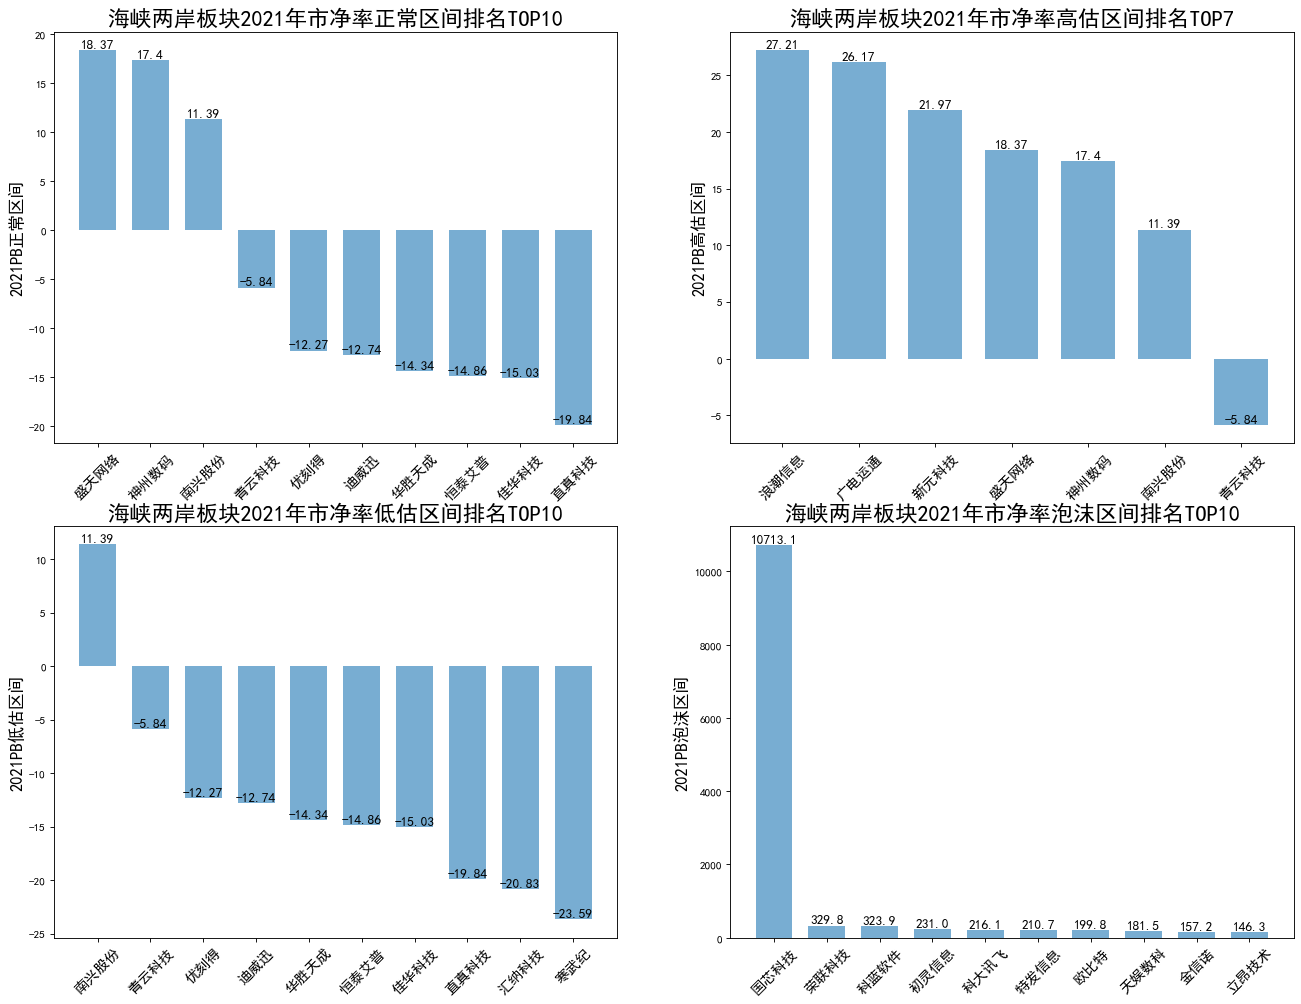

In [19]:
#需求12
stpe1 = df['PE'].sort_values(ascending=False).round(2)
data1 = stpe1[stpe1<=20][:10]
x = data1.index
y = data1.values
fig = plt.figure(figsize=(20,15),dpi = 80)
ax1 = fig.add_subplot(221)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_ylabel("2021PB正常区间",fontsize = 15)
ax1.set_title("海峡两岸板块2021年市净率正常区间排名TOP10",fontsize = 20)
plt.xticks(rotation = 45,size = 13)
for a,b in zip(x,y):
    ax1.text(a,b,b,ha = "center",va = "bottom",fontsize =12)

stpe2 = df['PE'].sort_values(ascending=False).round(2)
data2 = stpe2[stpe2<=28][:7]
x = data2.index
y = data2.values
ax1 = fig.add_subplot(222)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_ylabel("2021PB高估区间",fontsize = 15)
ax1.set_title("海峡两岸板块2021年市净率高估区间排名TOP7",fontsize = 20)
plt.xticks(rotation = 45,size = 13)
for a,b in zip(x,y):
    ax1.text(a,b,b,ha = "center",va = "bottom",fontsize =12)

stpe3 = df['PE'].sort_values(ascending=False).round(2)
data3 = stpe3[stpe3<14][:10]
x = data3.index
y = data3.values
ax1 = fig.add_subplot(223)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_ylabel("2021PB低估区间",fontsize = 15)
ax1.set_title("海峡两岸板块2021年市净率低估区间排名TOP10",fontsize = 20)
plt.xticks(rotation = 45,size = 13)
for a,b in zip(x,y):
    ax1.text(a,b,b,ha = "center",va = "bottom",fontsize =12)

stpe = df['PE'].sort_values(ascending=False)[:10].round(1)
x = stpe.index
y = stpe.values
ax1 = fig.add_subplot(224)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_ylabel("2021PB泡沫区间",fontsize = 15)
ax1.set_title("海峡两岸板块2021年市净率泡沫区间排名TOP10",fontsize = 20)
plt.xticks(rotation = 45,size = 13)
for a,b in zip(x,y):
    ax1.text(a,b,b,ha = "center",va = "bottom",fontsize =12)




plt.show()


#### (8) 市净率

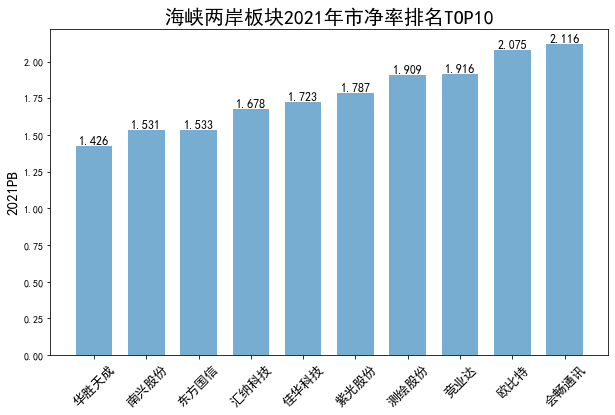

In [20]:
#需求13
stpb = df['PB'].sort_values(ascending=True)[:10].round(3)
x = stpb.index
y = stpb.values
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_ylabel("2021PB",fontsize = 15)
ax1.set_title("海峡两岸板块2021年市净率排名TOP10",fontsize = 20)
plt.xticks(rotation = 45,size = 13)
for a,b in zip(x,y):
    ax1.text(a,b,b,ha = "center",va = "bottom",fontsize =12)
plt.show()

#### (9) 企业价值

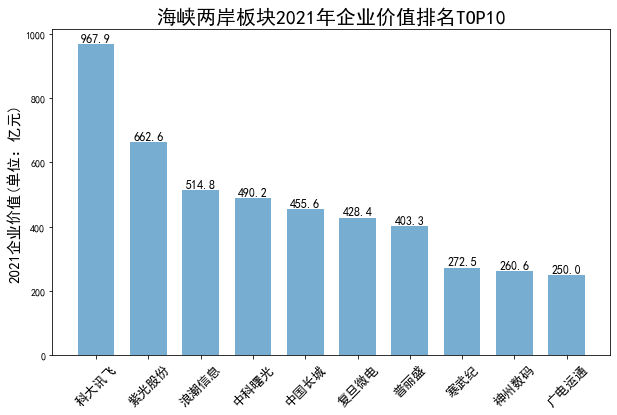

In [21]:
#需求14
stev = df['EV'].sort_values(ascending=False)[:10].round(1)
x = stev.index
y = stev.values
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_ylabel("2021企业价值(单位：亿元)",fontsize = 15)
ax1.set_title("海峡两岸板块2021年企业价值排名TOP10",fontsize = 20)
plt.xticks(rotation = 45,size = 13)
for a,b in zip(x,y):
    ax1.text(a,b,b,ha = "center",va = "bottom",fontsize =12)
plt.show()

#### (10)毛利率

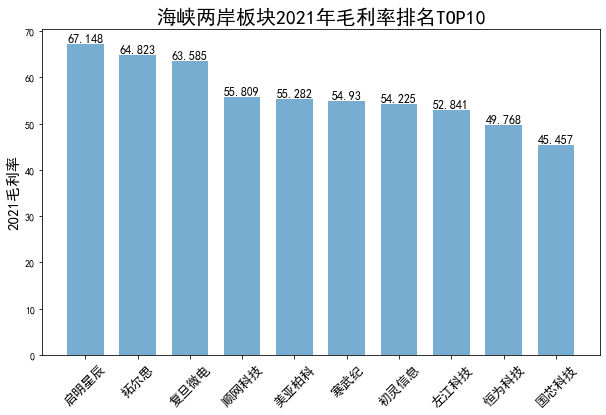

In [22]:
#需求15
stgpm = df['GPM'].sort_values(ascending=False)[:10].round(3)
x = stgpm.index
y = stgpm.values
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_ylabel("2021毛利率",fontsize = 15)
ax1.set_title("海峡两岸板块2021年毛利率排名TOP10",fontsize = 20)
plt.xticks(rotation = 45,size = 13)
for a,b in zip(x,y):
    ax1.text(a,b,b,ha = "center",va = "bottom",fontsize =12)
plt.show()

#### (11) 净利率

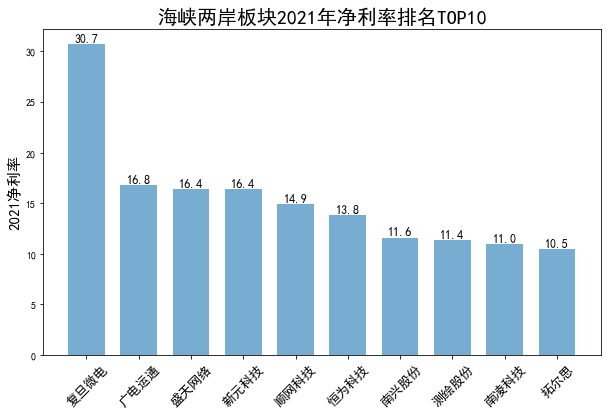

In [23]:
#需求17
stnpm = df['NPM'].sort_values(ascending=False)[:10].round(1)
x = stnpm.index
y = stnpm.values
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_ylabel("2021净利率",fontsize = 15)
ax1.set_title("海峡两岸板块2021年净利率排名TOP10",fontsize = 20)
plt.xticks(rotation = 45,size = 13)
for a,b in zip(x,y):
    ax1.text(a,b,b,ha = "center",va = "bottom",fontsize =12)
plt.show()

#### (12)企业价值倍数

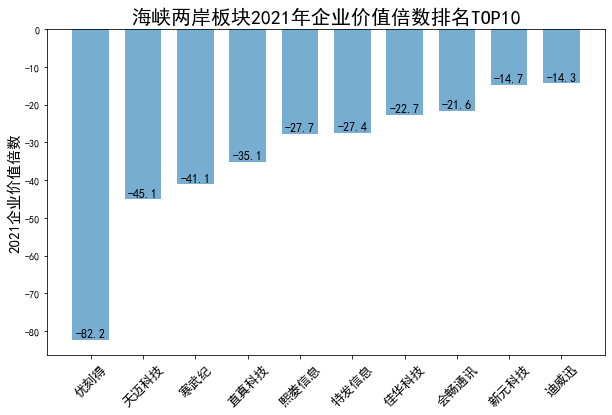

In [24]:
#需求18
stem = df['EM'].sort_values(ascending=True)[:10].round(1)
x = stem.index
y = stem.values
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x,y,width=0.7,alpha = 0.6)
ax1.set_ylabel("2021企业价值倍数",fontsize = 15)
ax1.set_title("海峡两岸板块2021年企业价值倍数排名TOP10",fontsize = 20)
plt.xticks(rotation = 45,size = 13)
for a,b in zip(x,y):
    ax1.text(a,b,b,ha = "center",va = "bottom",fontsize =12)
plt.show()

## 三、行研研究报告

## 四、总结与前景分析

## 参考文献